# Telco Customer Churn (EDA, mini-Project)

### Import Required Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler

### Load & Preview Data

In [79]:
df= pd.read_excel(r"C:\Users\Anakha Jose\Downloads\Dataset\Telco_customer_churn.xlsx")
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


### Basic Data Exploration

#### Column Info & Data type

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [81]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


#### Understand Raws and Columns

In [82]:
df.shape

(7043, 33)

#### Statistical Summary

In [83]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


### Data Cleaning
#### Drop Irrelevent Columns

In [84]:
df.drop(columns=['CustomerID', 'Country', 'State', 'City', 'Zip Code',
    'Lat Long', 'Latitude', 'Longitude', 'Count'], inplace=True, errors='ignore')

#### Missing Values Check

In [85]:
df.isnull().sum()

Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

#### Handle Missing Values

In [86]:
import warnings
warnings.filterwarnings("ignore")
df['Churn Reason'].fillna(df['Churn Reason'].mode()[0], inplace=True)

In [87]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

### Duplicate Records

In [88]:
df.duplicated().sum()

np.int64(0)

### Target Variable Analysis
#### Churn Distribution

In [89]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

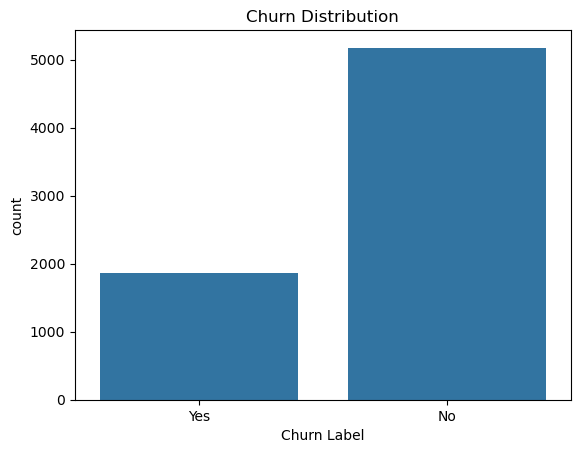

In [90]:
sns.countplot(x='Churn Label', data=df)
plt.title("Churn Distribution")
plt.show()

### Feature Chategorization

In [91]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

### Univariate Analysis
#### Numerical Features

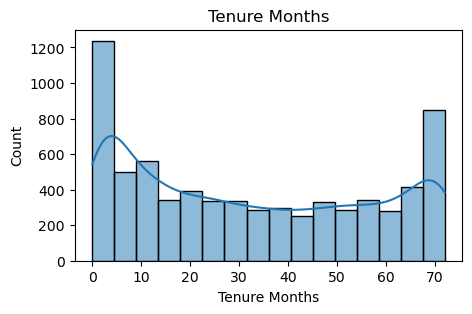

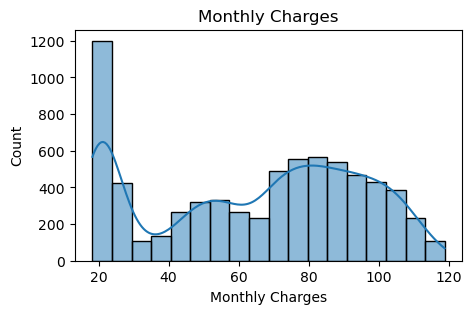

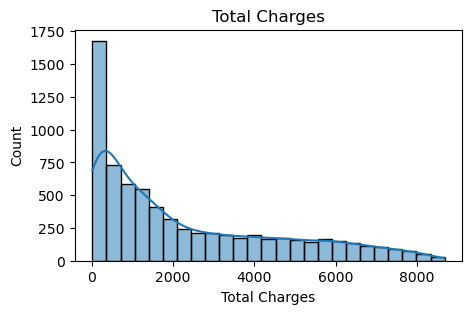

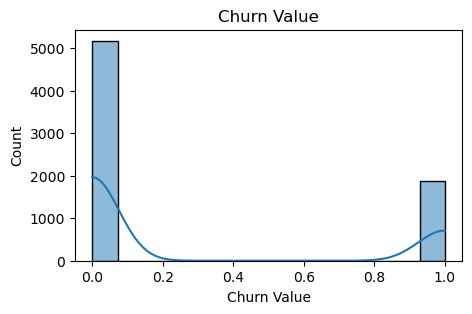

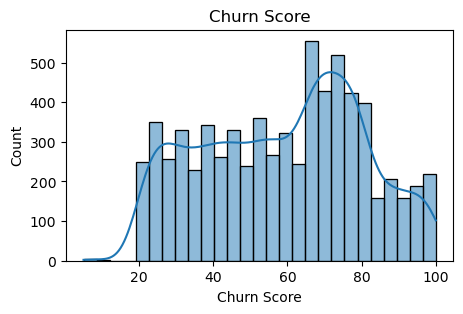

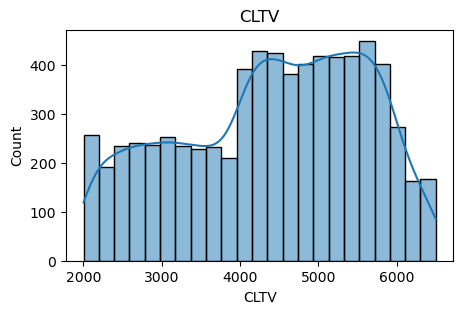

In [92]:
for col in numerical_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

#### Chategorical Features

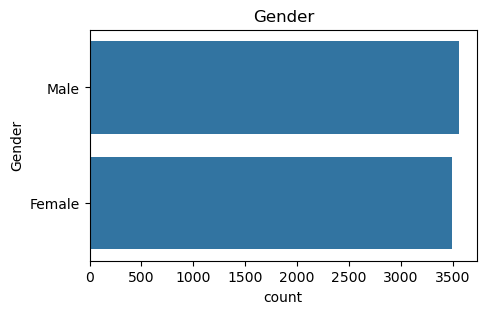

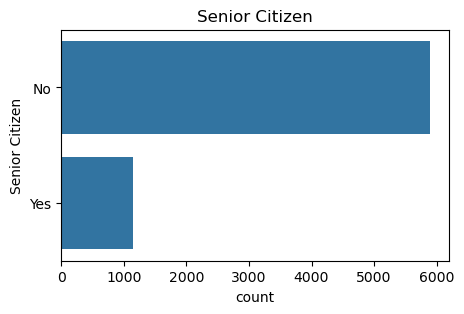

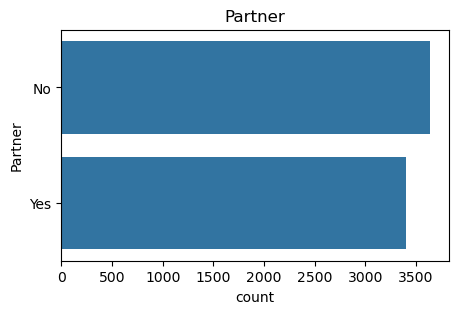

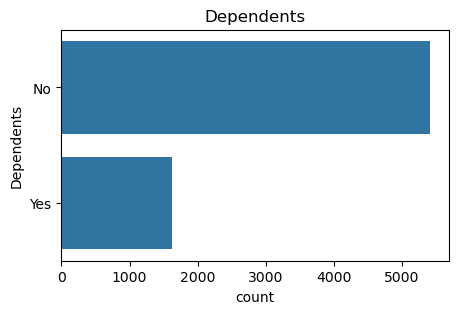

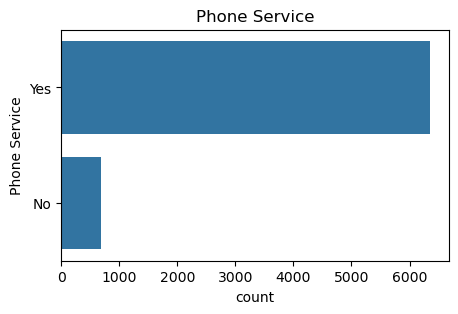

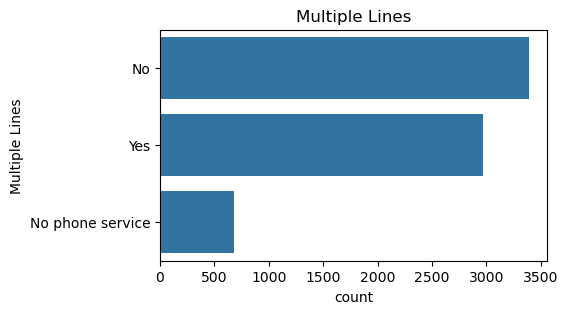

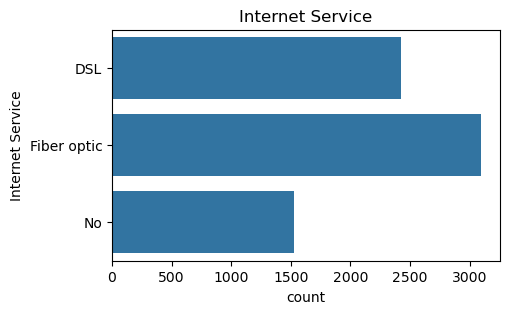

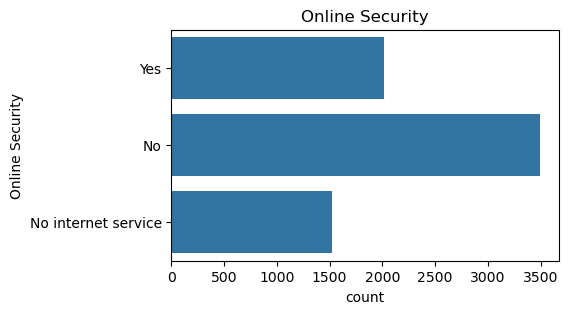

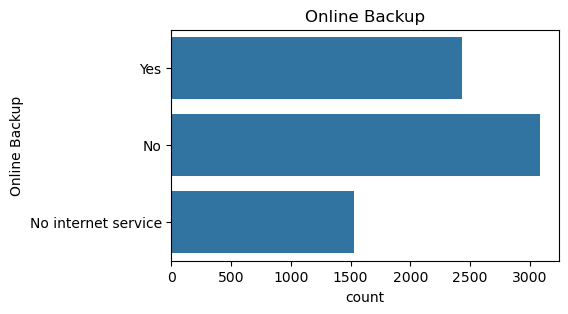

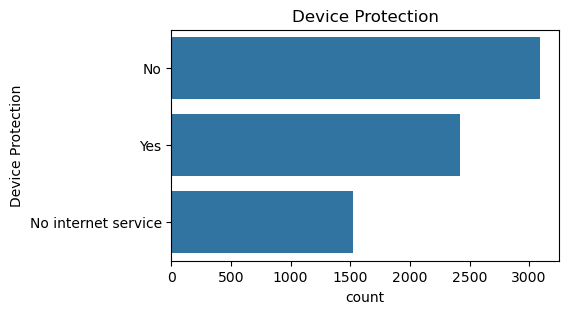

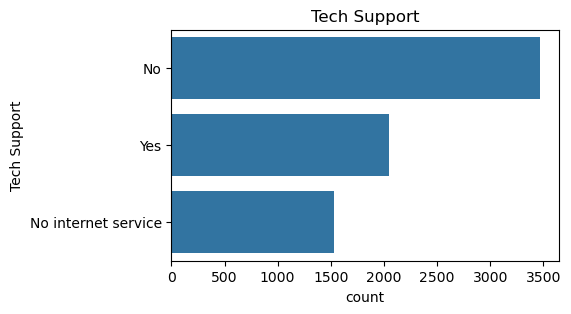

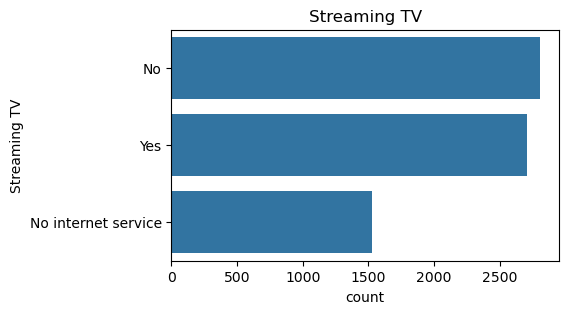

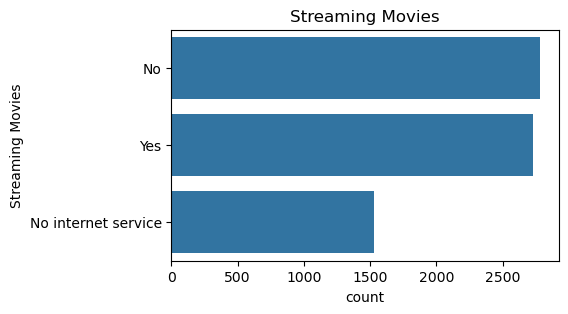

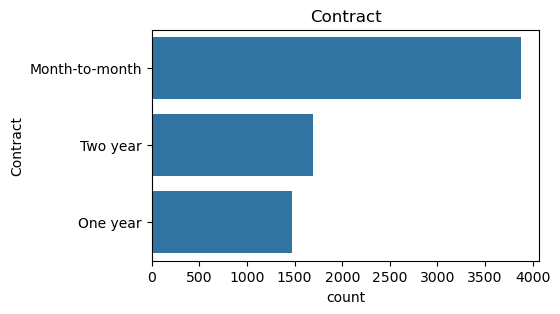

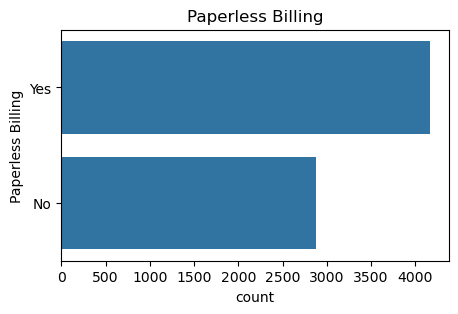

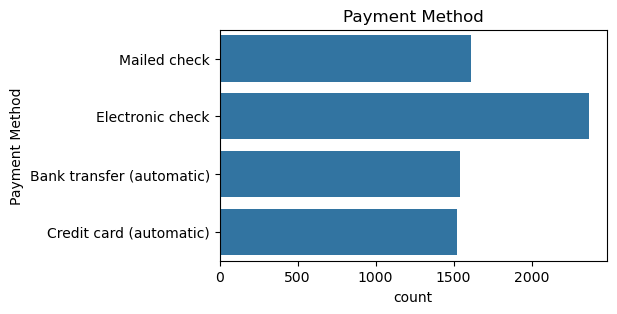

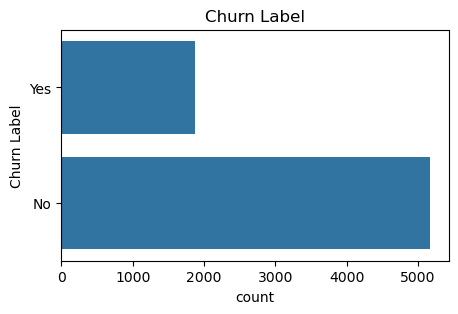

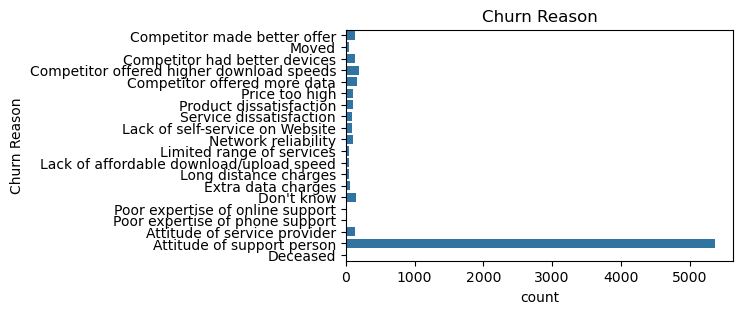

In [93]:
for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(y=col, data=df)
    plt.title(col)
    plt.show()

### Bivariate Analysis (Feature vs Churn)
#### Contract vs Churn

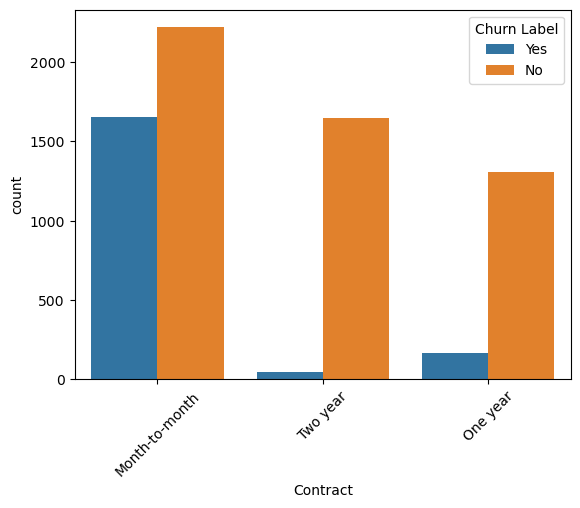

In [94]:
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.xticks(rotation=45)
plt.show()

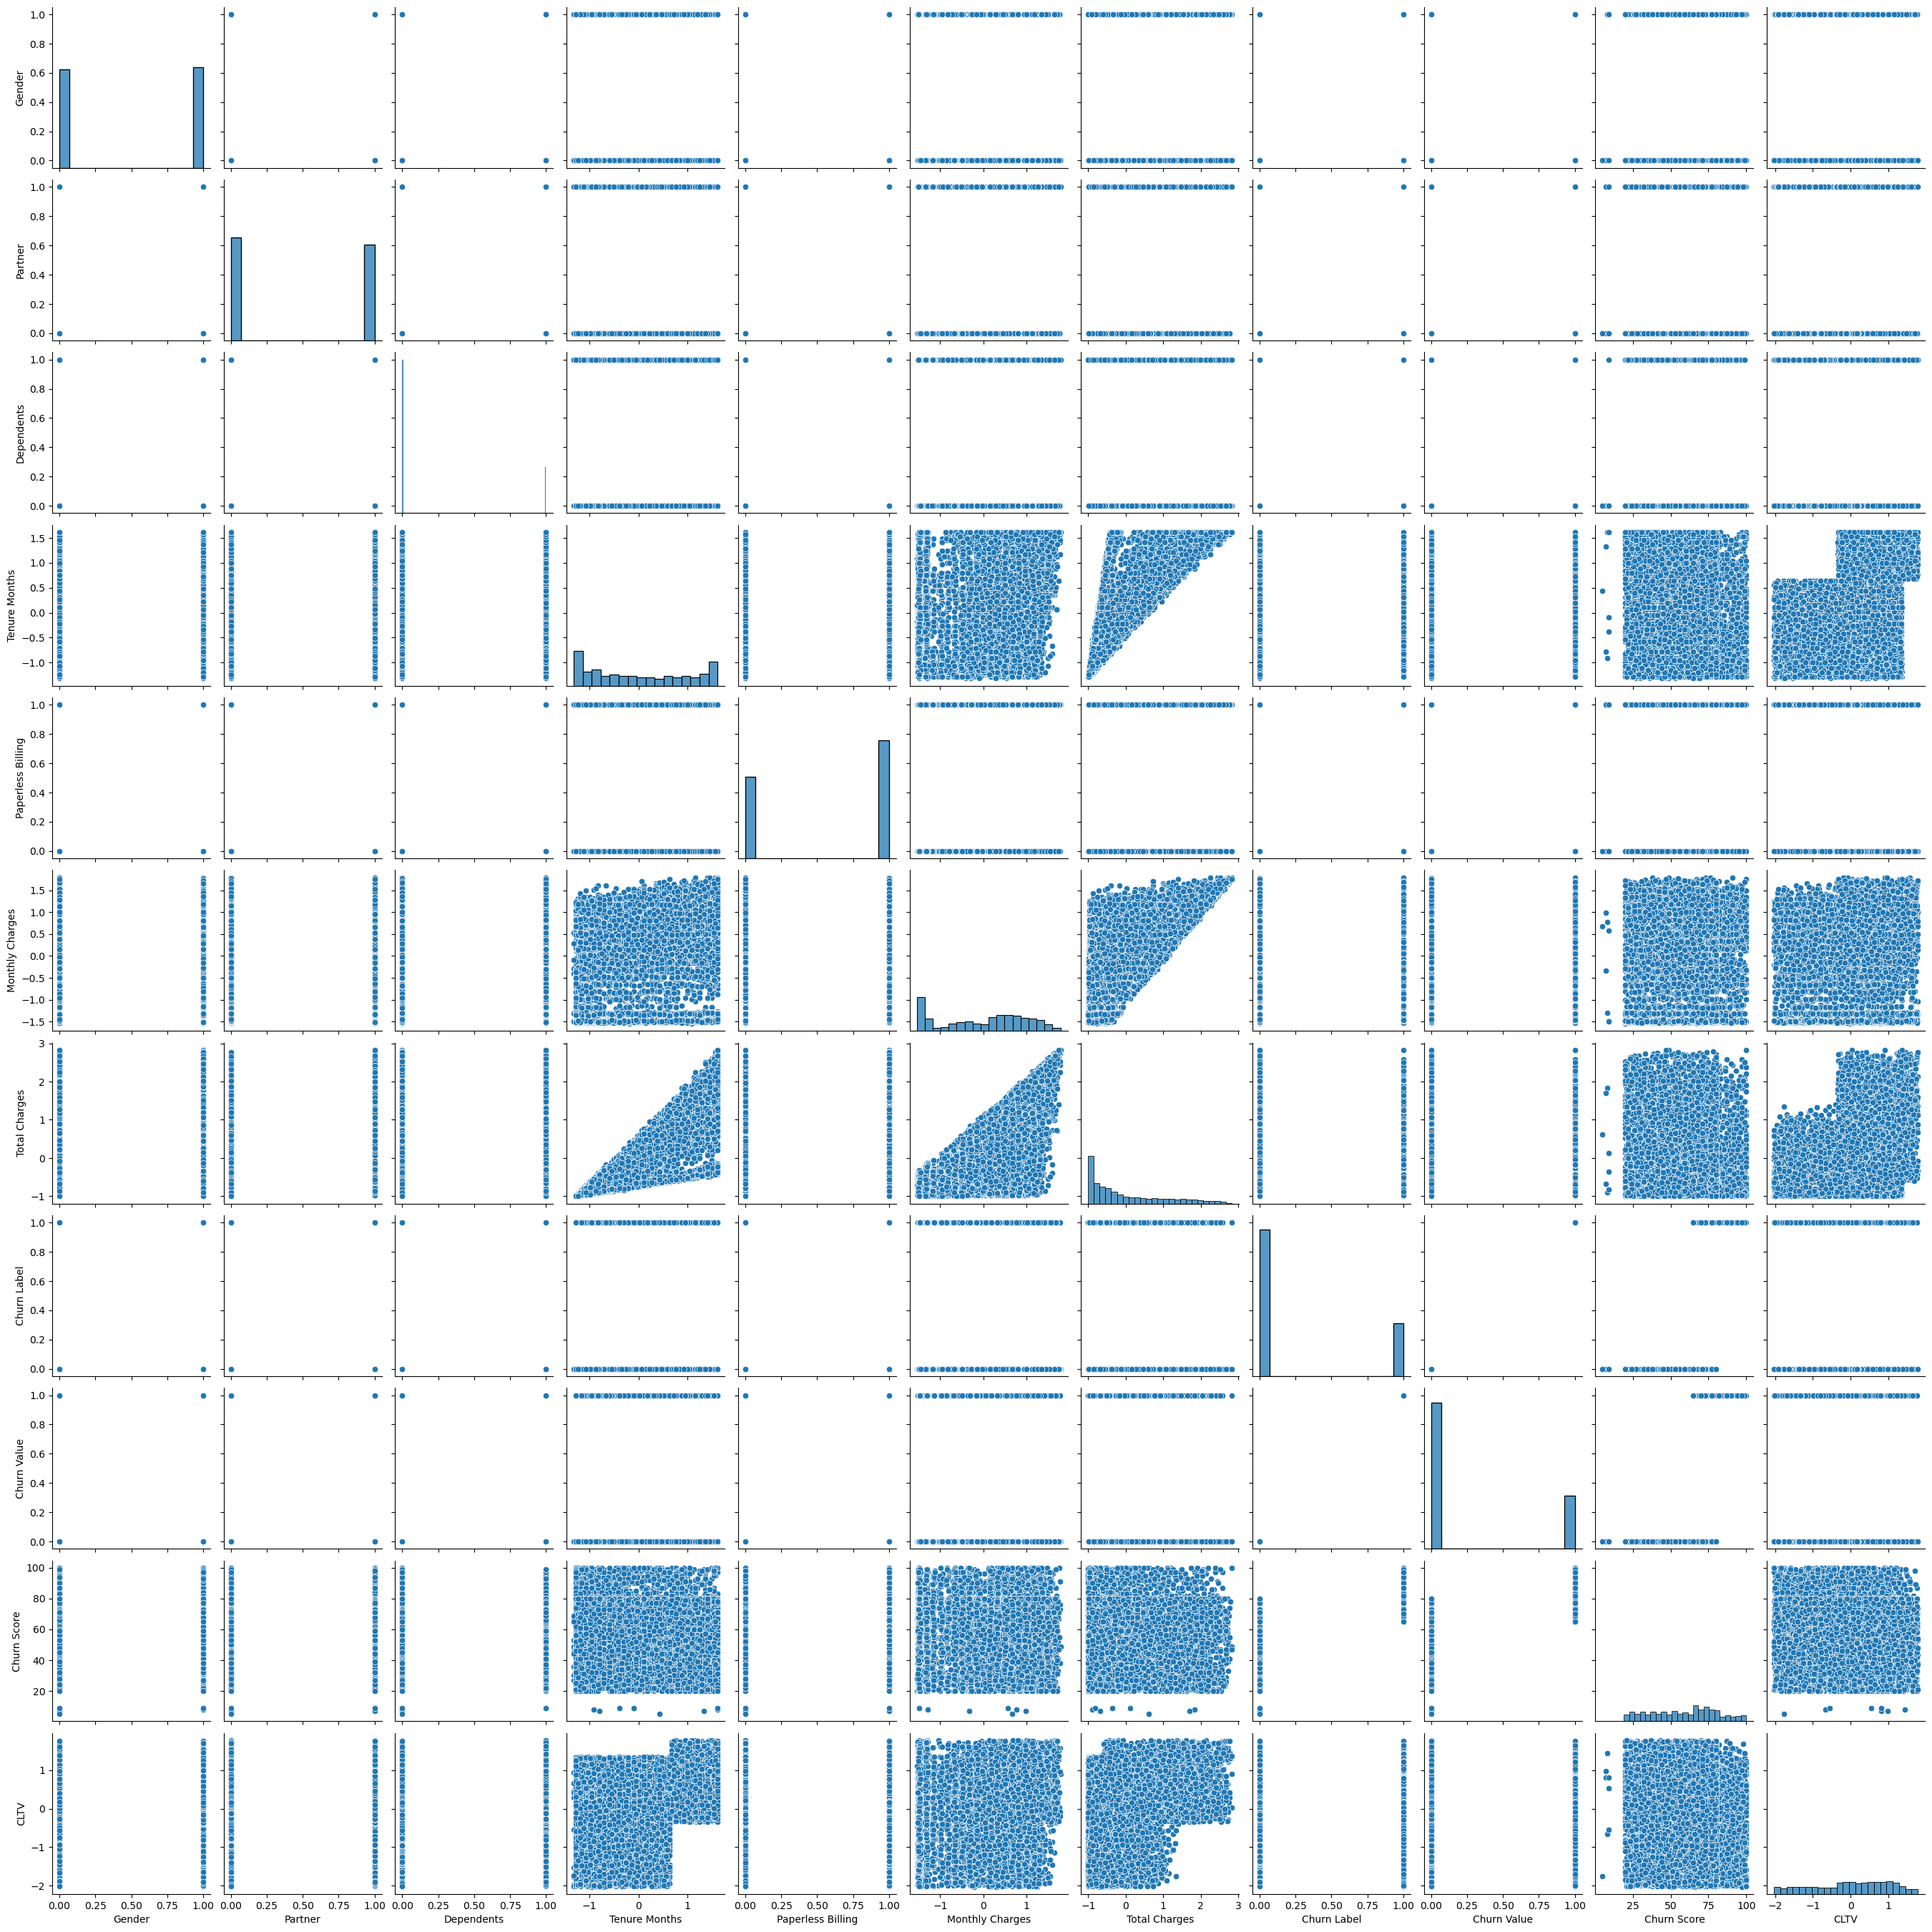

In [64]:
sns.pairplot(df)

#### Tenure vs Churn

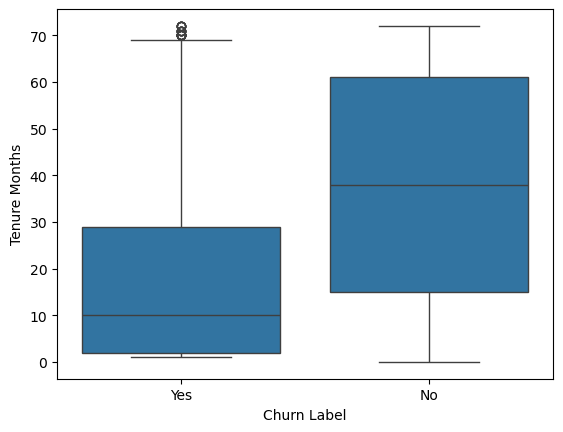

In [95]:
sns.boxplot(x='Churn Label', y='Tenure Months', data=df)
plt.show()

#### Monthly Charges vs Churn

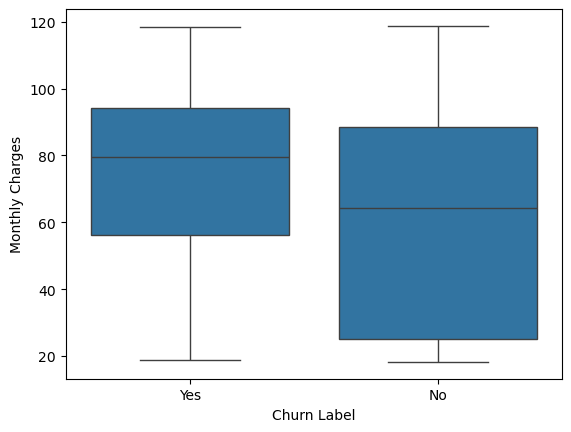

In [96]:
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df)
plt.show()

### Multivariate Analysis
#### Correlation Heatmap

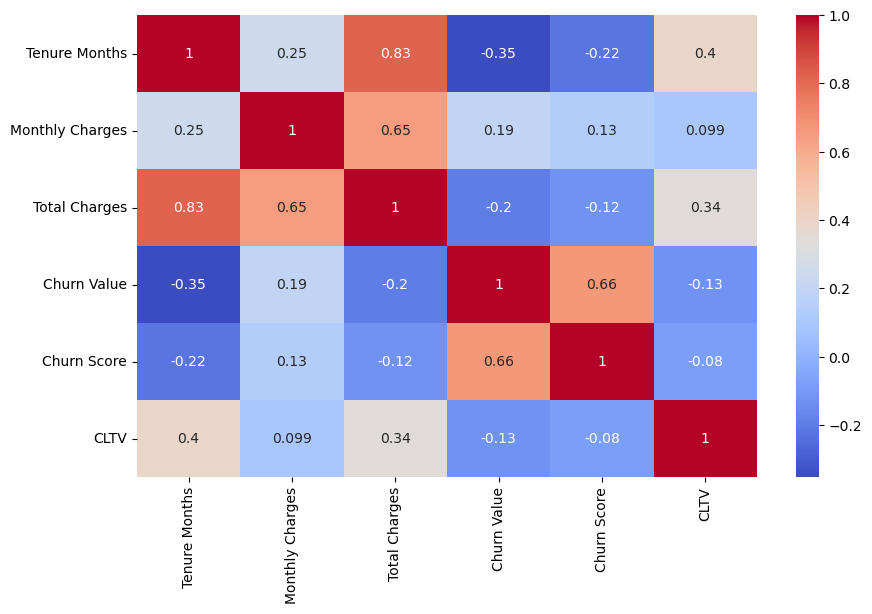

In [97]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

### Encoding Categorical Variables
#### Label Encoding 

In [98]:
binary_cols = ['Gender','Partner','Dependents','Paperless Billing','Churn Label']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [99]:
column=['Phone Service','Multiple Lines','Online Security','Online Backup','Device Protection','Tech Support',
'Streaming TV','Streaming Movies']
ab =LabelEncoder()
for i in column:
    df[i] = ab.fit_transform(df[i])

#### Nominal categorical → One-Hot Encoding

In [100]:
df = pd.get_dummies(
    df,
    columns=['Internet Service', 'Payment Method'],
    drop_first=True)

#### Ordinal categorical → Manual mapping

In [101]:
contract_map = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}
df['Contract'] = df['Contract'].map(contract_map)

In [102]:
df.drop(columns=['Churn Reason'], inplace=True)

#### One-Hot Encoding (Multi-Category)

In [23]:
# df = pd.get_dummies(df, drop_first=True)

### Feature Scaling
#### Standardization

In [103]:
scaler = StandardScaler()

scaled_cols = ['Tenure Months','Monthly Charges','Total Charges','CLTV']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [105]:
df[scaled_cols].dtypes

Tenure Months      float64
Monthly Charges    float64
Total Charges      float64
CLTV               float64
dtype: object

### Outlier Detection

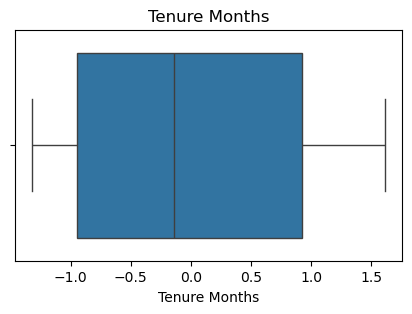

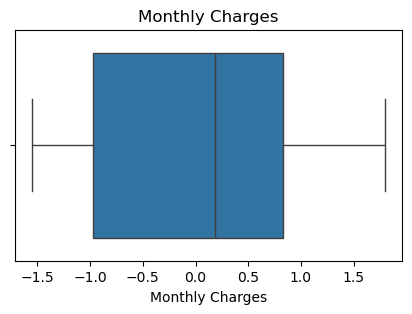

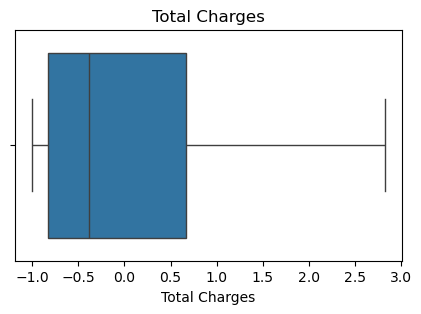

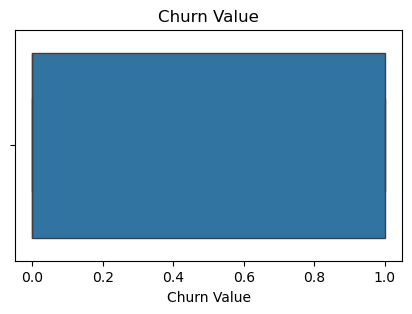

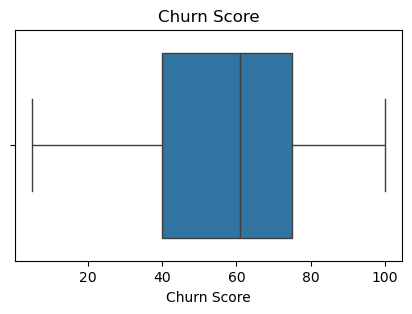

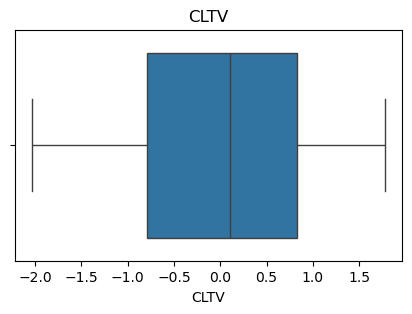

In [115]:
for col in numerical_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

### Outlier Capping

In [107]:
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower, upper)

### Final Dataset Check

In [108]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Internet Service_Fiber optic,Internet Service_No,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,No,0,0,-1.236724,1,0,2,2,0,...,-0.959674,1,1,86,-0.981675,False,False,False,False,True
1,0,No,0,1,-1.236724,1,0,0,0,0,...,-0.940470,1,1,67,-1.436462,True,False,False,True,False
2,0,No,0,1,-0.992402,1,2,0,0,2,...,-0.645186,1,1,86,0.821409,True,False,False,True,False
3,0,No,1,1,-0.177995,1,2,0,0,2,...,0.337349,1,1,84,0.509483,True,False,False,True,False
4,1,No,0,1,0.677133,1,2,0,2,2,...,1.216004,1,1,89,0.794358,True,False,False,False,False


In [109]:
df.shape

(7043, 26)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  7043 non-null   int64  
 1   Senior Citizen                          7043 non-null   object 
 2   Partner                                 7043 non-null   int64  
 3   Dependents                              7043 non-null   int64  
 4   Tenure Months                           7043 non-null   float64
 5   Phone Service                           7043 non-null   int64  
 6   Multiple Lines                          7043 non-null   int64  
 7   Online Security                         7043 non-null   int64  
 8   Online Backup                           7043 non-null   int64  
 9   Device Protection                       7043 non-null   int64  
 10  Tech Support                            7043 non-null   int6

### Save Cleaned Data 

In [113]:
df.to_csv("cleaned_telco_churn.csv", index=False)